In [67]:
# setting up the environment for week1

! wget https://raw.githubusercontent.com/hse-aml/natural-language-processing/master/setup_google_colab.py -O setup_google_colab.py
import setup_google_colab
setup_google_colab.setup_week1()

--2019-09-25 21:34:03--  https://raw.githubusercontent.com/hse-aml/natural-language-processing/master/setup_google_colab.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2330 (2.3K) [text/plain]
Saving to: ‘setup_google_colab.py’

setup_google_colab. 100%[===================>]   2.28K  --.-KB/s    in 0s      

2019-09-25 21:34:03 (34.8 MB/s) - ‘setup_google_colab.py’ saved [2330/2330]



In [68]:
#downloading the data.........

import sys
sys.path.append("..")
from common.download_utils import download_week1_resources

download_week1_resources()

File data/train.tsv is already downloaded.
File data/validation.tsv is already downloaded.
File data/test.tsv is already downloaded.
File data/text_prepare_tests.tsv is already downloaded.


In [0]:
#adding grader for gradding assignment.....

from grader import Grader
grader = Grader()

In [124]:
#email and tokens........

STUDENT_EMAIL = 'awanrahman55@gmail.com'
STUDENT_TOKEN = ''
grader.status()

You want to submit these parts:
Task TextPrepare:
 sqlite php readonly
creating multiple textboxes dynamically
self one prefer javascript
save php date...
Task WordsTagsCount:
 javascript,c#,java
using,php,java...
Task BagOfWords:
 0...
Task MultilabelClassification:
 0	php
1	javascript,jquery
2	
3	javascript,jquery
4	android,java
5	php,xml
6	json
7	java
8	python
9	h...


In [70]:
#import libraries..........

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from ast import literal_eval
import pandas as pd
import numpy as np

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# TEXT PROCESSING

In [0]:
def read_data(filename):
    data = pd.read_csv(filename, sep='\t')
    data['tags'] = data['tags'].apply(literal_eval)
    return data

In [0]:
train = read_data('data/train.tsv')
validation = read_data('data/validation.tsv')
test = pd.read_csv('data/test.tsv', sep='\t')

In [73]:
train.head()

,title,tags
0,How to draw a stacked dotplot in R?,[r]
1,mysql select all records where a datetime fiel...,"[php, mysql]"
2,How to terminate windows phone 8.1 app,[c#]
3,get current time in a specific country via jquery,"[javascript, jquery]"
4,Configuring Tomcat to Use SSL,[java]


In [0]:
X_train, y_train = train['title'].values, train['tags'].values
X_val, y_val = validation['title'].values, validation['tags'].values
X_test = test['title'].values

In [75]:
print(X_train)

['How to draw a stacked dotplot in R?'
 'mysql select all records where a datetime field is less than a specified value'
 'How to terminate windows phone 8.1 app' ...
 'Python Pandas Series of Datetimes to Seconds Since the Epoch'
 'jqGrid issue grouping - Duplicate rows get appended every time sort is changed'
 'Create a List of primitive int?']


In [0]:
import re

In [0]:

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def text_prepare(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower()
    text = re.sub(REPLACE_BY_SPACE_RE,' ',text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text =re.sub(BAD_SYMBOLS_RE,'',text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join([word for word in text.split() if word not in STOPWORDS])  # delete stopwords from text
    text = text.strip()
    return text

In [78]:
text = "SQL Server - any equivalent of Excel's CHOOSE function?"
text1 = text.lower()
text2 = REPLACE_BY_SPACE_RE.sub(' ', text1)
text3 = BAD_SYMBOLS_RE.sub('', text2)
text4 = ' '.join([word for word in nltk.word_tokenize(text3) if word not in STOPWORDS])
text5 = text4.strip(' ')
print(text, '\n', text1, '\n', text2, '\n', text3, '\n', text4, '\n', text5)

SQL Server - any equivalent of Excel's CHOOSE function? 
 sql server - any equivalent of excel's choose function? 
 sql server - any equivalent of excel's choose function? 
 sql server  any equivalent of excels choose function 
 sql server equivalent excels choose function 
 sql server equivalent excels choose function


In [0]:
def test_text_prepare():
    examples = ["SQL Server - any equivalent of Excel's CHOOSE function?",
                "How to free c++ memory vector<int> * arr?"]
    answers = ["sql server equivalent excels choose function", 
               "free c++ memory vectorint arr"]
    for ex, ans in zip(examples, answers):
        if text_prepare(ex) != ans:
            return "Wrong answer for the case: '%s'" % ex
    return 'Basic tests are passed.'

In [80]:
print(test_text_prepare())

Basic tests are passed.


In [81]:

prepared_questions = []
for line in open('data/text_prepare_tests.tsv', encoding='utf-8'):
    line = text_prepare(line.strip())
    prepared_questions.append(line)
text_prepare_results = '\n'.join(prepared_questions)

grader.submit_tag('TextPrepare', text_prepare_results)

Current answer for task TextPrepare is:
 sqlite php readonly
creating multiple textboxes dynamically
self one prefer javascript
save php date...


In [0]:
#Now we can preprocess the titles using function text_prepare and making sure that the headers don't have bad symbols
X_train = [text_prepare(x) for x in X_train]
X_val = [text_prepare(x) for x in X_val]
X_test = [text_prepare(x) for x in X_test]

In [83]:
X_train[:3]

['draw stacked dotplot r',
 'mysql select records datetime field less specified value',
 'terminate windows phone 81 app']

**Task 2 (WordsTagsCount)**. Find 3 most popular tags and 3 most popular words in the train data and submit the results to earn the points.

In [0]:
# Dictionary of all tags from train corpus with their counts.
tags_counts = {}
# Dictionary of all words from train corpus with their counts.
words_counts = {}
b=0

######################################
######### YOUR CODE HERE #############
from collections import Counter
#counting words....
tags_counts = Counter()
words_counts = Counter()
for words in X_train:
  for x in words.split():
    words_counts[x] += 1
    
#counting popular......

for tags in y_train :
  for x in tags:
    tags_counts[x] += 1
    

    

In [85]:
 
most_common_tags = sorted(tags_counts.items(), key=lambda x: x[1], reverse=True)[:3]
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)[:3]

grader.submit_tag('WordsTagsCount', '%s\n%s' % (','.join(tag for tag, _ in most_common_tags), 
                                                ','.join(word for word, _ in most_common_words)))
                  

Current answer for task WordsTagsCount is:
 javascript,c#,java
using,php,java...


# Transforming text to a vector

Machine Learning algorithms work with numeric data and we cannot use the provided text data "as is". There are many ways to transform text data to numeric vectors. In this task you will try to use two of them.



### Bag of words

One of the well-known approaches is a bag-of-words representation. To create this transformation, follow the steps:

Find N most popular words in train corpus and numerate them. Now we have a dictionary of the most popular words.
For each title in the corpora create a zero vector with the dimension equals to N.
For each text in the corpora iterate over words which are in the dictionary and increase by 1 the corresponding coordinate.
Let's try to do it for a toy example. Imagine that we have N = 4 and the list of the most popular words is

['hi', 'you', 'me', 'are']

Then we need to numerate them, for example, like this:

{'hi': 0, 'you': 1, 'me': 2, 'are': 3}

And we have the text, which we want to transform to the vector:

'hi how are you'

For this text we create a corresponding zero vector

[0, 0, 0, 0]

And iterate over all words, and if the word is in the dictionary, we increase the value of the corresponding position in the vector:

'hi':  [1, 0, 0, 0]
'how': [1, 0, 0, 0] # word 'how' is not in our dictionary
'are': [1, 0, 0, 1]
'you': [1, 1, 0, 1]

The resulting vector will be

[1, 1, 0, 1]

Implement the described encoding in the function my_bag_of_words with the size of the dictionary equals to 5000. To find the most common words use train data. You can test your code using the function test_my_bag_of_words.

In [0]:
DICT_SIZE = 5000
VOCAB = words_counts.most_common(DICT_SIZE)
WORDS_TO_INDEX =  {word_to_indx[0]:x for x, word_to_indx in enumerate(sorted(VOCAB, key=lambda i:i[1], reverse=True))}####### YOUR CODE HERE #######
INDEX_TO_WORDS =  {x:word for word, x in WORDS_TO_INDEX.items()}####### YOUR CODE HERE #######
ALL_WORDS = WORDS_TO_INDEX.keys()

def my_bag_of_words(text, words_to_index, dict_size):
    """
        text: a string
        dict_size: size of the dictionary
        
        return a vector which is a bag-of-words representation of 'text'
    """
    result_vector = np.zeros(dict_size)
    ######################################
    ######### YOUR CODE HERE #############
    ######################################
    for words in text.split(' '):
        if words in words_to_index:
            result_vector[words_to_index[words]] +=1

    return result_vector

In [0]:

def test_my_bag_of_words():
    words_to_index = {'hi': 0, 'you': 1, 'me': 2, 'are': 3}
    examples = ['hi how are you']
    answers = [[1, 1, 0, 1]]
    for ex, ans in zip(examples, answers):
        if (my_bag_of_words(ex, words_to_index, 4) != ans).any():
            return "Wrong answer for the case: '%s'" % ex
    return 'Basic tests are passed.'

In [143]:

print(test_my_bag_of_words())

Basic tests are passed.


In [0]:
from scipy import sparse as sp_sparse

In [144]:
X_train_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_train])
X_val_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_val])
X_test_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_test])
print('X_train shape ', X_train_mybag.shape)
print('X_val shape ', X_val_mybag.shape)
print('X_test shape ', X_test_mybag.shape)

X_train shape  (100000, 5000)
X_val shape  (30000, 5000)
X_test shape  (20000, 5000)


## **Task 3 (BagOfWords).**  

For the 11th row in X_train_mybag find how many non-zero elements it has. In this task the answer (variable non_zero_elements_count) should be a number, e.g. 20.



In [145]:

row = X_train_mybag[10].toarray()[0]
non_zero_elements_count = np.count_nonzero(row) ####### YOUR CODE HERE #######

grader.submit_tag('BagOfWords', str(non_zero_elements_count))

Current answer for task BagOfWords is:
 7...


## TF-IDF

The second approach extends the bag-of-words framework by taking into account total frequencies of words in the corpora. It helps to penalize too frequent words and provide better features space.

Implement function tfidf_features using class TfidfVectorizer from scikit-learn. Use train corpus to train a vectorizer. Don't forget to take a look into the arguments that you can pass to it. We suggest that you filter out too rare words (occur less than in 5 titles) and too frequent words (occur more than in 90% of the titles). Also, use bigrams along with unigrams in your vocabulary.

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
def tfidf_features(X_train, X_val, X_test):
    """
        X_train, X_val, X_test — samples        
        return TF-IDF vectorized representation of each sample and vocabulary
    """
    # Create TF-IDF vectorizer with a proper parameters choice
    # Fit the vectorizer on the train set
    # Transform the train, test, and val sets and return the result
    
    
    tfidf_vectorizer = TfidfVectorizer(token_pattern=r'\S+' , ngram_range=(1, 2) , min_df=5 , max_df = 0.9)####### YOUR CODE HERE #######
    , 
    ######################################
    ######### YOUR CODE HERE #############
    ######################################
    X_train = tfidf_vectorizer.fit_transform(X_train)
    X_val = tfidf_vectorizer.transform(X_val)
    X_test = tfidf_vectorizer.transform(X_test)
    
    
    return X_train, X_val, X_test, tfidf_vectorizer.vocabulary_

In this case, check whether you have c++ or c# in your vocabulary, as they are obviously important tokens in our tags prediction task:

In [0]:
X_train_tfidf, X_val_tfidf, X_test_tfidf, tfidf_vocab = tfidf_features(X_train, X_val, X_test)
tfidf_reversed_vocab = {i:word for word,i in tfidf_vocab.items()}

In [95]:
print(tfidf_vocab["c#"])
print(tfidf_vocab["c++"])

1879
1976


## MultiLabel classifier

As we have noticed before, in this task each example can have multiple tags. To deal with such kind of prediction, we need to transform labels in a binary form and the prediction will be a mask of 0s and 1s. For this purpose it is convenient to use MultiLabelBinarizer from sklearn.

In [0]:
from sklearn.preprocessing import MultiLabelBinarizer

In [0]:
mlb = MultiLabelBinarizer(classes=sorted(tags_counts.keys()))
y_train = mlb.fit_transform(y_train)
y_val = mlb.fit_transform(y_val)


Implement the function train_classifier for training a classifier. In this task we suggest to use** One-vs-Rest approach**, which is implemented in **OneVsRestClassifier** class. In this approach k classifiers (= number of tags) are trained. As a basic classifier, use LogisticRegression. It is one of the simplest methods, but often it performs good enough in text classification tasks. It might take some time, because a number of classifiers to train is large.

In [0]:

from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier

In [0]:
def train_classifier(X_train, y_train):
    """
      X_train, y_train — training data
      
      return: trained classifier
    """
    
    # Create and fit LogisticRegression wraped into OneVsRestClassifier.

    ######################################
    ######### YOUR CODE HERE #############
    ######################################
    classifier = OneVsRestClassifier(LogisticRegression(penalty='l2'))
    classifier.fit(X_train,y_train)
    
    return classifier
    

Train the classifiers for different data transformations: bag-of-words and tf-idf.

In [100]:
classifier_mybag = train_classifier(X_train_mybag, y_train)
classifier_tfidf = train_classifier(X_train_tfidf, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Now you can create predictions for the data. You will need two types of predictions: labels and scores.

In [0]:
y_val_predicted_labels_mybag = classifier_mybag.predict(X_val_mybag)
y_val_predicted_scores_mybag = classifier_mybag.decision_function(X_val_mybag)

y_val_predicted_labels_tfidf = classifier_tfidf.predict(X_val_tfidf)
y_val_predicted_scores_tfidf = classifier_tfidf.decision_function(X_val_tfidf)

now take a look at how classifier, which uses TF-IDF, works for a few examples:

In [103]:
y_val_pred_inversed = mlb.inverse_transform(y_val_predicted_labels_tfidf)
y_val_inversed = mlb.inverse_transform(y_val)
for i in range(3):
    print('Title:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        X_val[i],
        ','.join(y_val_inversed[i]),
        ','.join(y_val_pred_inversed[i])
    ))

Title:	odbc_exec always fail
True labels:	php,sql
Predicted labels:	


Title:	access base classes variable within child class
True labels:	javascript
Predicted labels:	


Title:	contenttype application json required rails
True labels:	ruby,ruby-on-rails
Predicted labels:	json,ruby-on-rails




Now, we would need to compare the results of different predictions, e.g. to see whether TF-IDF transformation helps or to try different regularization techniques in logistic regression. For all these experiments, we need to setup evaluation procedure.

## Evaluation

To evaluate the results we will use several classification metrics:

-->Accuracy

-->F1-score

-->Area under ROC-curve

-->Area under precision-recall curve


In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score


Implement the function print_evaluation_scores which calculates and prints to stdout:

accuracy

F1-score macro/micro/weighted

Precision macro/micro/weighted

In [0]:
def print_evaluation_scores(y_val, predicted):
    
    ######################################
    ######### YOUR CODE HERE #############
    ######################################
    print( "accuracy : ",accuracy_score(y_val, predicted))
    print("f1_score (macro) : " , f1_score(y_val, predicted, labels=None, average='macro'))
    print( "f1_score (micro) : ", f1_score(y_val, predicted, labels=None, average='micro'))
    print("f1_score (weighted) : ", f1_score(y_val, predicted, labels=None, average='weighted'))
    

In [106]:
print('Bag-of-words')
print_evaluation_scores(y_val, y_val_predicted_labels_mybag)
print('Tfidf')
print_evaluation_scores(y_val, y_val_predicted_labels_tfidf)

Bag-of-words
accuracy :  0.04426666666666667


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


f1_score (macro) :  0.010113304832202696
f1_score (micro) :  0.10545901692392326
f1_score (weighted) :  0.08275726016806238
Tfidf
accuracy :  0.33393333333333336
f1_score (macro) :  0.44570945215918634
f1_score (micro) :  0.6418233967551946
f1_score (weighted) :  0.6143634328155098


You might also want to plot some generalization of the **ROC curve** for the case of multi-label classification. Provided function roc_auc can make it for you. The input parameters of this function are:

true labels
decision functions scores
number of classes

In [0]:
from metrics import roc_auc
%matplotlib inline

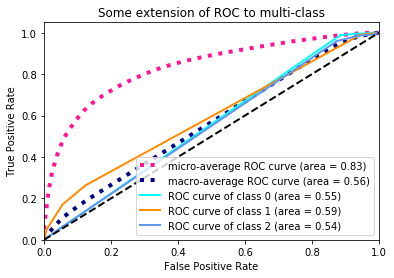

In [64]:
n_classes = len(tags_counts)
roc_auc(y_val, y_val_predicted_scores_mybag, n_classes)

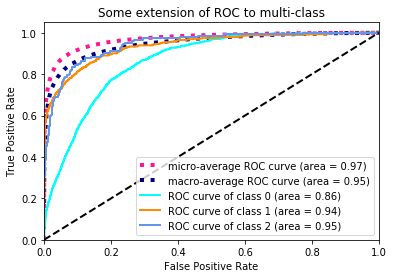

In [65]:
n_classes = len(tags_counts)
roc_auc(y_val, y_val_predicted_scores_tfidf, n_classes)

## Task 4 (MultilabelClassification).

Once we have the evaluation set up, we suggest that you experiment a bit with training your classifiers. We will use F1-score weighted as an evaluation metric. Our recommendation:

compare the quality of the bag-of-words and TF-IDF approaches and chose one of them.
for the chosen one, try L1 and L2-regularization techniques in Logistic Regression with different coefficients (e.g. C equal to 0.1, 1, 10, 100).

create predictions for test set

In [107]:
test_predictions = classifier_tfidf.predict(X_test_tfidf) ######### YOUR CODE HERE #############
test_pred_inversed = mlb.inverse_transform(test_predictions)

test_predictions_for_submission = '\n'.join('%i\t%s' % (i, ','.join(row)) for i, row in enumerate(test_pred_inversed))
grader.submit_tag('MultilabelClassification', test_predictions_for_submission)

Current answer for task MultilabelClassification is:
 0	php
1	javascript,jquery
2	
3	javascript,jquery
4	android,java
5	php,xml
6	json
7	java
8	python
9	h...


## Analysis of the most important features

Finally, it is usually a good idea to look at the features (words or n-grams) that are used with the largest weigths in your logistic regression model.

Implement the function print_words_for_tag to find them. Get back to sklearn documentation on **OneVsRestClassifier** and **LogisticRegression** if needed.

In [119]:
print(classifier_tfidf.coef_.shape)

(100, 18300)


In [0]:
def print_words_for_tag(classifier, tag, tags_classes, index_to_words, all_words):
    """
        classifier: trained classifier
        tag: particular tag
        tags_classes: a list of classes names from MultiLabelBinarizer
        index_to_words: index_to_words transformation
        all_words: all words in the dictionary
        
        return nothing, just print top 5 positive and top 5 negative words for current tag
    """
    print('Tag:\t{}'.format(tag))
    
    # Extract an estimator from the classifier for the given tag.
    # Extract feature coefficients from the estimator. 
    
    ######################################
    ######### YOUR CODE HERE #############
    ######################################
    coefficient=classifier.coef_[tags_classes.index(tag)]
    xx = {i: coefficient[i] for i in range(len(coefficient))}
    result=sorted(xx.items(), key=lambda x: x[1], reverse=True)
    
    
    top_positive_words = [ index_to_words[x[0]] for x in result[ : 5 ] ] # top-5 words sorted by the coefficiens.
    top_negative_words =  [ index_to_words[ x[0] ] for x in result[ : 5] ] # bottom-5 words  sorted by the coefficients.
    print('Top positive words:\t{}'.format(', '.join(top_positive_words)))
    print('Top negative words:\t{}\n'.format(', '.join(top_negative_words)))

In [118]:
print_words_for_tag(classifier_tfidf, 'c', mlb.classes, tfidf_reversed_vocab, ALL_WORDS)
print_words_for_tag(classifier_tfidf, 'c++', mlb.classes, tfidf_reversed_vocab, ALL_WORDS)
print_words_for_tag(classifier_tfidf, 'linux', mlb.classes, tfidf_reversed_vocab, ALL_WORDS)

Tag:	c
Top positive words:	c, malloc, scanf, printf, gcc
Top negative words:	c, malloc, scanf, printf, gcc

Tag:	c++
Top positive words:	c++, qt, boost, mfc, opencv
Top negative words:	c++, qt, boost, mfc, opencv

Tag:	linux
Top positive words:	linux, ubuntu, c, address, signal
Top negative words:	linux, ubuntu, c, address, signal



## Authorization & Submission

o submit assignment parts to Cousera platform, please, enter your e-mail and token into variables below. You can generate token on this programming assignment page. Note: Token expires 30 minutes after generation.

In [120]:
grader.status()

You want to submit these parts:
Task TextPrepare:
 sqlite php readonly
creating multiple textboxes dynamically
self one prefer javascript
save php date...
Task WordsTagsCount:
 javascript,c#,java
using,php,java...
Task BagOfWords:
 0...
Task MultilabelClassification:
 0	php
1	javascript,jquery
2	
3	javascript,jquery
4	android,java
5	php,xml
6	json
7	java
8	python
9	h...


In [146]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!
